FCC: Getting started with the production and analysis of fast-simulated events
===================================================================================


Contents:

  * [FCC: Getting started with the production and analysis of fast\-simulated events](#fcc-getting-started-with-the-production-and-analysis-of-fast-simulated-events)
    * [Overview](#overview)
    * [Installation](#installation)
    * [Getting started with papas (FCC\-ee)](#Getting-started-with-papas-fcc-ee)
      * [Set up your working directory](#set-up-your-working-directory)
      * [Generate events with pythia8](#generate-events-with-pythia8)
      * [Run papas and the analysis in heppy](#run-papas-and-the-analysis-in-heppy)
      * [Make plots](#make-plots)
    * [Getting started with Delphes (FCC\-hh)](#Getting-started-with-Delphes-[FCC-hh])
      * [Set up your working directory](#set-up-your-working-directory-1)
      * [Run FCCSW with Pythia8+Delphes](#run-fccsw-with-pythia8-+-delphes)
      * [Run the analysis in heppy](#run-the-analysis-in-heppy)
      * [Make plots](#make-plots-1)
      * [CutFlow](#cutflow)

## Overview

If you want to get started fast with the analysis of fast-simulated events, you’re at the right place.

We currently support two different approaches for fast simulation, Papas and Delphes. For now,

   * FCC-ee users are encouraged to use Papas,
   * FCC-hh and FCC-eh users should use Delphes.

However, ultimately, all users are encouraged to try both fast simulations and to compare the results.

An analysis ntuple will be produced with `heppy`, a simple modular event processing framework for high energy physics.

**This tutorial focuses on FCC-ee users**

## Installation

*No need of installation, the environment for the FCC software it's already configured and ready to be used.*


Getting started with papas (FCC-ee)
----------------------------------------

In this tutorial, you will learn how to:

   * generate events with pythia8 and write them in the FCC EDM format.
   * read these events with heppy to run the papas simulation and the analysis to create an ntuple
   * read this ntuple with ROOT to make a few plots

But first, you will set up a working directory for your analysis.

### Set up your working directory

In Swan, your current working directory will be the folder where the running python notebook is.

*However, interaction with the environment is also possible*



Get a pythia8 card file to generate ZH events. To download this file, do:

In [1]:
!wget https://raw.githubusercontent.com/HEP-FCC/fcc-physics/master/pythia8/ee_ZH_Zmumu_Hbb.txt

--2018-04-05 15:56:34--  https://raw.githubusercontent.com/HEP-FCC/fcc-physics/master/pythia8/ee_ZH_Zmumu_Hbb.txt
Resolving raw.githubusercontent.com... 151.101.36.133
Connecting to raw.githubusercontent.com|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1309 (1.3K) [text/plain]
Saving to: “ee_ZH_Zmumu_Hbb.txt”

100%[======================================>] 1,309       --.-K/s   in 0s      

2018-04-05 15:56:34 (39.6 MB/s) - “ee_ZH_Zmumu_Hbb.txt” saved [1309/1309]



Check that your file has been downloaded in your current directory:

In [2]:
! ls .

ee_ZH_Zmumu_Hbb.txt  FccSoftwareGettingStartedFastSim.ipynb


Get the [heppy](https://github.com/HEP-FCC/heppy.git) file for a ZH analysis:

In [3]:
! cp $HEPPY/test/analysis_ee_ZH_cfg.py .

Check again your directory:

In [4]:
! ls

analysis_ee_ZH_cfg.py  FccSoftwareGettingStartedFastSim.ipynb
ee_ZH_Zmumu_Hbb.txt


### Generate events with pythia8

Here, we decide to use the standalone `fcc-physics` package to generate events instead of FCCSW. The advantage of the `fcc-physics` package is that it is supported for several operating systems, and in particular for mac os X and linux while FCCSW only works on lxplus. In other words, you could use fcc-physics to generate events on your notebook. That being said, it is of course possible to generate events with FCCSW. - 

#### **In SWAN, this is not a problem for the users since the environment is homogenous for all of them**

Generate ee to ZH events with Z to mumu and H to b bbar:

In [5]:
! fcc-pythia8-generate ee_ZH_Zmumu_Hbb.txt

start processing
output file: ee_ZH_Zmumu_Hbb.root

 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.230      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change:  6 Oct 2017  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 05 Apr 2018 at 15:56:45    |  | 
 |  |                                                     


 Pythia::next(): 100 events have been generated 

 Pythia::next(): 200 events have been generated 

 Pythia::next(): 300 events have been generated 

 Pythia::next(): 400 events have been generated 

 Pythia::next(): 500 events have been generated 

 Pythia::next(): 600 events have been generated 

 Pythia::next(): 700 events have been generated 

 Pythia::next(): 800 events have been generated 

 Pythia::next(): 900 events have been generated 

 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                          

You should obtain a file `ee_ZH_Zmumu_Hbb.root` written in the FCC EDM format. Let us open it and check the contents.

In Swan, **from the python kernel**, we can do this either on `python` or `c++`.

In [6]:
import ROOT

Welcome to JupyROOT 6.12/04


**C++ example**

In [7]:
%%cpp
auto f = new TFile("ee_ZH_Zmumu_Hbb.root")

(TFile *) 0x7effa40


In [8]:
%%cpp 
events->Print()

******************************************************************************
*Tree    :events    : Events tree                                            *
*Entries :     1000 : Total =        10863964 bytes  File  Size =    2990901 *
*        :          : Tree compression factor =   3.63                       *
******************************************************************************
*Br    0 :EventInfo : Int_t EventInfo_                                       *
*Entries :     1000 : Total  Size=       9722 bytes  File Size  =       1392 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.81     *
*............................................................................*
*Br    1 :EventInfo.number : Int_t number[EventInfo_]                        *
*Entries :     1000 : Total  Size=       8710 bytes  File Size  =       2891 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.80     *
*...................................................

You’re getting a list of the available collections. You can use root to draw the distribution of a variable. For example, the distribution of the charge of the stable generated muons:

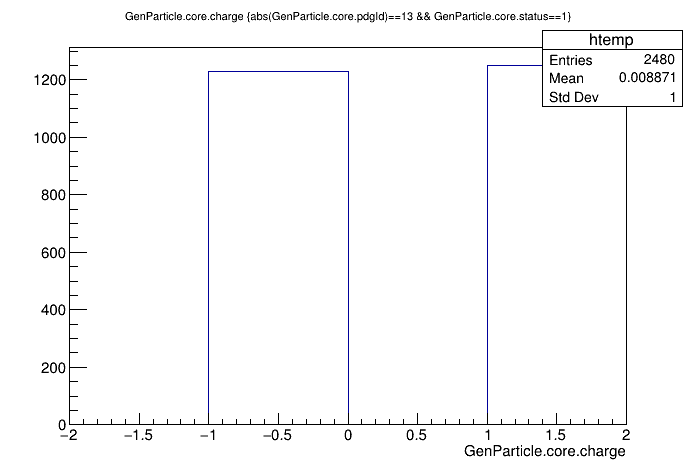

In [9]:
%%cpp
auto c = new TCanvas();
events->Draw("GenParticle.core.charge", "abs(GenParticle.core.pdgId)==13 && GenParticle.core.status==1");
c->Draw();

** Python example **

Let's now reproduce the same example in `python`:

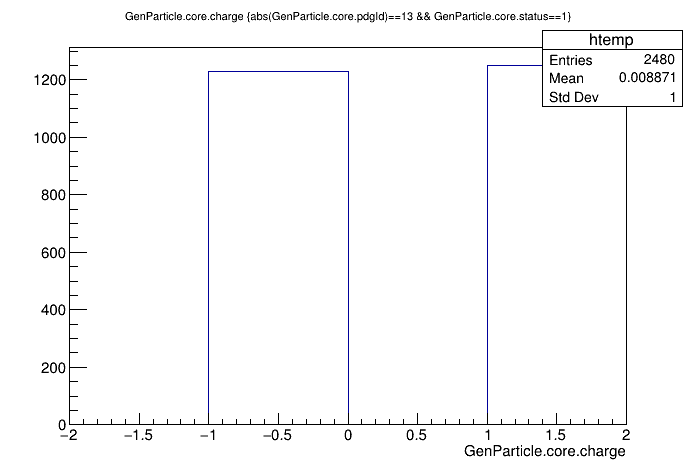

In [10]:
import ROOT
f = ROOT.TFile("ee_ZH_Zmumu_Hbb.root")

c1 = ROOT.TCanvas()
f.events.Draw("GenParticle.core.charge", "abs(GenParticle.core.pdgId)==13 && GenParticle.core.status==1")
c1.Draw()

We are now going to run the `papas` simulation and to build an ntuple with meaningful variables for the analysis.

### Run papas and the analysis in [heppy](https://github.com/HEP-FCC/heppy.git)

The `ROOT file` obtained in the previous section contains for each event all generated particles produced by `pythia`.

In this section we will run an heppy job to: 

- run papas, a fast simulation that processes these generated particles to produce “reconstructed” particles 
- process the papas reconstructed particles and compute various analysis variables 
- store these variables in an ntuple written in an output root file.

The [heppy](https://github.com/HEP-FCC/heppy.git) configuration file describing these steps,
[analysis\_ee\_ZH\_cfg.py](https://github.com/HEP-FCC/heppy/blob/master/test/analysis_ee_ZH_cfg.py),
is explained [here](https://github.com/HEP-FCC/heppy/blob/master/doc/example_analysis.md).
Just refer to this documentation as needed while following the instructions below.

**DISCLAIMER**: Original tutorial uses heppy as a command to do this part interactively, this is not fully integrated yet. But we can still run `heppy` as if we were in a bash shell to produce the output files we need.


First, produce the display for the first event:

Ensure the `OutDir` directory does not exist in the current directory, if so you will need to remove it (uncomment and run the following line):

In [ ]:
#! rm -rf OutDir

In [11]:
# Heppy needs to know if we are running a CMS or FCC analysis
import os
os.environ['FCCPHYSICS'] = "yes"

In [12]:
! heppy OutDir analysis_ee_ZH_cfg.py -N 300

]0;IPython: FCC-Gallery/testingGalleryJet clusterizer in ee mode, ee_kt, E sorting
#--------------------------------------------------------------------------
#                         FastJet release 3.3.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the terms of the GNU GPLv2.
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code
# and 3rd party plugin jet algorithms. See COPYING file for details.
#-------------------------------------------------------------------

For your analysis, you will be able to use parallel processing, either on a multicore machine or on the CERN LSF cluster.

You get an output directory `OutDir` . Check its contents and the contents of its subdirectories. 

In [13]:
!ls OutDir/*

analysis_ee_ZH_cfg.py
__cfg_to_run__.py
component.pck
config.pck
heppy.analyzers.examples.zh.selection.Selection_cuts
heppy.analyzers.examples.zh.ZHTreeProducer.ZHTreeProducer_1
heppy.analyzers.fcc.JetClusterizer.JetClusterizer_1
heppy.analyzers.fcc.Reader.Reader_1
heppy.analyzers.IsolationAnalyzer.IsolationAnalyzer_1
heppy.analyzers.Masker.Masker_1
heppy.analyzers.PapasDisplay.PapasDisplay_1
heppy.analyzers.PapasPFBlockBuilder.PapasPFBlockBuilder_1
heppy.analyzers.PapasPFReconstructor.PapasPFReconstructor_1
heppy.analyzers.PapasSim.PapasSim_papas
heppy.analyzers.PDebugger.PDebugger_1
heppy.analyzers.RecoilBuilder.RecoilBuilder_missing_energy
heppy.analyzers.RecoilBuilder.RecoilBuilder_recoil
heppy.analyzers.ResonanceBuilder.ResonanceBuilder_1
heppy.analyzers.ResonanceBuilder.ResonanceBuilder_2
heppy.analyzers.Selector.Selector_1
heppy.analyzers.Selector.Selector_sel_iso_leptons
heppy.analyzers.Selector.Selector_sel_leptons
log.txt
software.yaml


In particular, the following root file contains an ntuple with the variables we need:

```
OutDir/ee_ZH_Zmumu_Hbb/heppy.analyzers.examples.zh.ZHTreeProducer.ZHTreeProducer_1/tree.root

```

### Make plots

Open the root file containing the ntuple in root **through python**:

In [14]:
import ROOT
fname="OutDir/ee_ZH_Zmumu_Hbb/heppy.analyzers.examples.zh.ZHTreeProducer.ZHTreeProducer_1/tree.root"

f1 = ROOT.TFile(fname)

Make a few plots:


**reconstructed Z mass:**

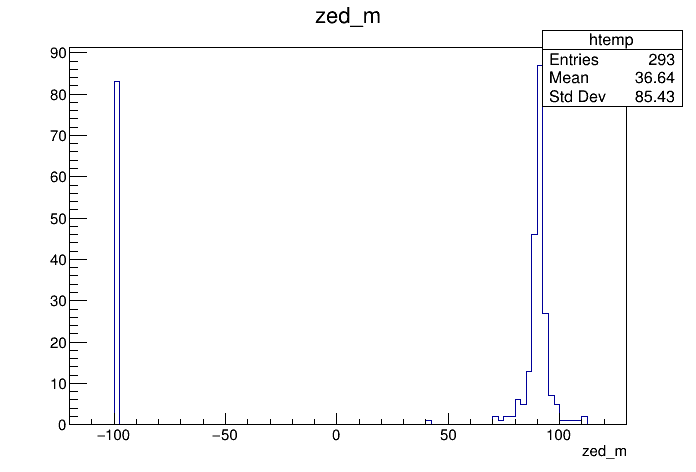

In [15]:
c1 = ROOT.TCanvas()
f1.events.Draw("zed_m")
c1.Draw()

**recoil mass:**

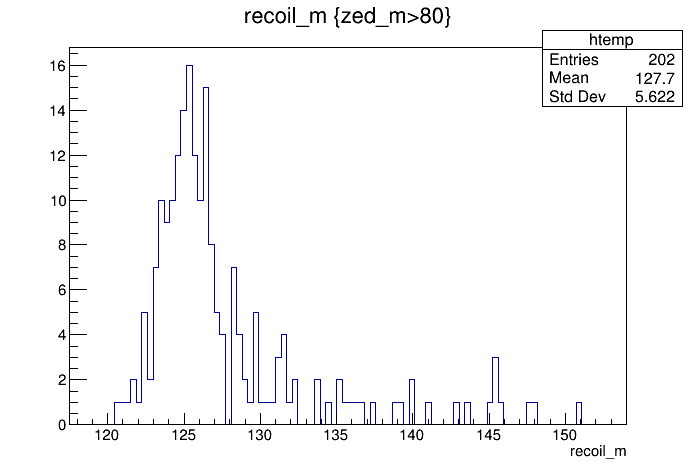

In [16]:
c1 = ROOT.TCanvas() 
f1.events.Draw("recoil_m", "zed_m>80")
c1.Draw()

**dijet mass (note that jets have not been calibrated, using raw jets here):**

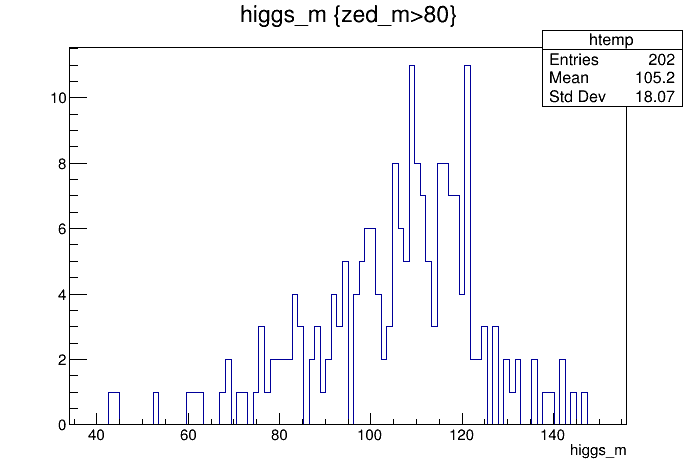

In [17]:
c1 = ROOT.TCanvas() 
f1.events.Draw("higgs_m", "zed_m>80")
c1.Draw()


### More information

Please refer to the [heppy documentation](https://github.com/HEP-FCC/heppy/blob/master/README.md)


## Getting started with Delphes [FCC-hh]


In this tutorial, you will learn how to:

-   generate events with Pythia8, process them through Delphes with
    FCCSW and write them in the FCC EDM format.
-   read these events with [heppy](https://github.com/HEP-FCC/heppy.git) to perfom basic selection and create an
    ntuple
-   read this ntuple with ROOT to make a few plots


### Run FCCSW with Pythia8+Delphes

Now you are ready to produce 100TeV ttbar events with Pythia, process them through Delphes and store them in the FCC-EDM:

**NOTE**: *The following part is a bit hacky, we are working to make all this process as transparent as possible for the user* 

In [18]:
! git clone https://github.com/HEP-FCC/FCCSW.git

Initialized empty Git repository in /eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/FCCSW/.git/
remote: Counting objects: 24620, done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 24620 (delta 34), reused 43 (delta 17), pack-reused 24534
Receiving objects: 100% (24620/24620), 171.90 MiB | 2.68 MiB/s, done.
Resolving deltas: 100% (15433/15433), done.


In [19]:
! FCCSWPATH=/cvmfs/fcc.cern.ch/sw/releases/0.9.1/x86_64-slc6-gcc62-opt/linux-scientificcernslc6-x86_64/gcc-6.2.0/fccsw-0.9.1-c5dqdyv4gt5smfxxwoluqj2pjrdqvjuj  && \
  cd FCCSW && $FCCSWPATH/run $FCCVIEW/scripts/gaudirun.py Sim/SimDelphesInterface/options/PythiaDelphes_config.py

# setting LC_ALL to "C"
# --> Including file '/eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/FCCSW/Sim/SimDelphesInterface/options/PythiaDelphes_config.py'
# <-- End of file '/eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/FCCSW/Sim/SimDelphesInterface/options/PythiaDelphes_config.py'
ApplicationMgr    SUCCESS 
                                                   Welcome to FCCSW version HEAD
                                          running on 974aa2a31d1c on Thu Apr  5 16:02:58 2018
ApplicationMgr       INFO Application Manager Configured successfully
** INFO: adding module        ParticlePropagator       ParticlePropagator       
** INFO: adding module        Efficiency               ChargedHadronTrackingEfficiency
** INFO: adding module        Efficiency               ElectronTrackingEfficiency
** INFO: adding module        Efficiency               MuonTrackingEfficiency   
** INFO: adding module        MomentumSmearing         ChargedHadronMomentumSmeari


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.230      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 6  Oct 2017  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 05 Apr 2018 at 16:03:04    |  | 
 |  |                                                                              |  | 
 |  |   Christian Bi


 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  5.000e+04, e =  5.000e+04, m =  9.383e-01.
 Beam B: id =   2212, pz = -5.000e+04, e =  5.000e+04, m =  9.383e-01.

 In 1: id =   21, x =  3.955e-03, pdf =  1.602e+01 at Q2 =  7.181e+04.
 In 2: id =   21, x =  8.523e-03, pdf =  9.202e+00 at same Q2.

 Subprocess g g -> t tbar with code 601 is 2 -> 2.
 It has sHat =  3.371e+05,    tHat = -2.031e+05,    uHat = -7.540e+04,
       pTHat =  2.071e+02,   m3Hat =  1.721e+02,   m4Hat =  1.700e+02,
    thetaHat =  2.059e+00,  phiHat =  1.239e+00.
     alphaEM =  7.914e-03,  alphaS =  1.116e-01    at Q2 =  7.217e+04.

 Impact parameter b =  7.437e-01 gives enhancement factor =  1.360e+00.
 Max pT scale for MPI =  1.000e+05, ISR =  1.000e+05, FSR =  1.000e+05.
 Number of MPI =    16, ISR =    53, FSRproc =   220, FSRreson =    25.

 --------  End PYTHIA Info Listing  ------------------------------------

 --------  PYTHIA Event Listing  (hard p

In [20]:
! ls FCCSW/FCCDelphesOutput.root

FCCSW/FCCDelphesOutput.root


you should obtain a file called `FCCDelphesOutput.root`.

This example will run 100 events by default. To have more events for plotting purposes, you can increase this number or use files that have been already produced and stored on eos (see next section).

With this file you are now ready to run the analysis framework [heppy](https://github.com/HEP-FCC/heppy.git).


### Run the analysis in heppy

Taking as a reference the following ttbar example from [heppy](https://github.com/HEP-FCC/heppy/blob/master/test/analysis_hh_ttbar_cfg.py), modify the analysis code to use the file you produced running FCCSW previously as input:

In [21]:
! curl https://raw.githubusercontent.com/HEP-FCC/heppy/master/test/analysis_hh_ttbar_cfg.py -o analysis_hh_ttbar_cfg.py && \
    sed -i "s@files = \[".*"\]@files = ['$PWD/FCCSW/FCCDelphesOutput.root']@" analysis_hh_ttbar_cfg.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4821  100  4821    0     0  10204      0 --:--:-- --:--:-- --:--:-- 26932


If you skip the previous step, the example will use files already produced and stored on eos, so
you would need to setup eos:

    export EOS_MGM_URL="root://eospublic.cern.ch"

Now you are ready to run the ttbar example:

In [22]:
! heppy myoutput analysis_hh_ttbar_cfg.py

]0;IPython: FCC-Gallery/testingGallery
Component: example
	dataset_entries:   0
	files          :   ['/eos/user/j/jcervant/SWAN_projects/FCC-Gallery/testingGallery/FCCSW/FCCDelphesOutput.root']
	isData         :   False
	isEmbed        :   False
	isMC           :   False
	tree_name      :   None
	triggers       :   None


      ---- TimeReport (all times in ms; first evt is skipped) ---- 
processed    all evts    time/proc    time/all   [%]    analyer
---------    --------    ---------   ---------  -----   -------------
      100         100        14.37       14.37  94.0%   heppy.analyzers.fcc.Reader.Reader_1
      100         100         0.04        0.04   0.2%   heppy.analyzers.Selector.Selector_jets_30
      100         100         0.01        0.01   0.1%   heppy.analyzers.Selector.Selector_sel_muons
      100         100         0.02        0.02   0.1%   heppy.analyzers.Selector.Selector_sel_electrons
      100         100         0.01        0.01   0.0%   heppy.analyzers.Select

You get an output directory `myoutput` . Check its contents and the
contents of its subdirectories. In particular, the following root file
contains an ntuple with the variables we need:

In [23]:
! ls myoutput/example/heppy.analyzers.examples.ttbar.TTbarTreeProducer.TTbarTreeProducer_1/tree.root

myoutput/example/heppy.analyzers.examples.ttbar.TTbarTreeProducer.TTbarTreeProducer_1/tree.root


### Make plots

Open the root file containing the ntuple in from python:

In [24]:
import ROOT

fname="myoutput/example/heppy.analyzers.examples.ttbar.TTbarTreeProducer.TTbarTreeProducer_1/tree.root"

f1 = ROOT.TFile(fname)


**reconstructed W leptonic transverse mass:**

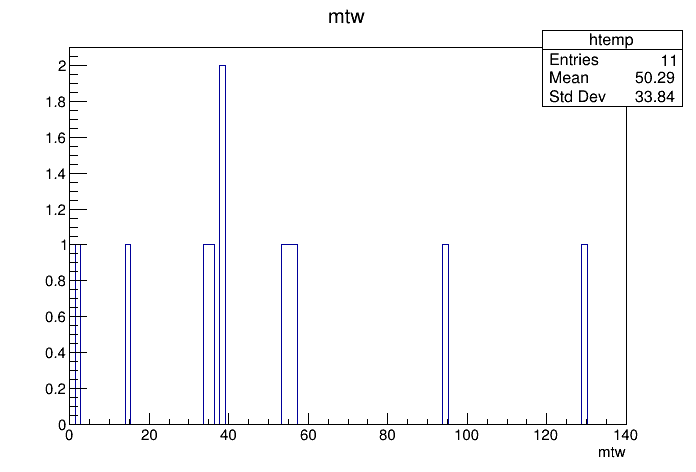

In [25]:
c1 = ROOT.TCanvas() 
f1.events.Draw("mtw")
c1.Draw()

### CutFlow

The file

    myoutput/example/heppy.analyzers.examples.ttbar.selection.Selection_cuts/cut_flow.txt 

contains a cut flow

```
Counter cut_flow :
	 All events                                   10000 	 1.00 	 1.0000
	 At least 4 jets                               8170 	 0.82 	 0.8170
	 At least 1 b-jet                              7153 	 0.88 	 0.7153
	 Exactly 1 lepton                              1303 	 0.18 	 0.1303
	 MET > 20GeV                                   1202 	 0.92 	 0.1202
```

The first column represents the cut, the second one the raw number of events, the third one the efficiency of the cut, and the last one the overall efficiency.